In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

% matplotlib inline

# 读取数据
data = pd.read_csv("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\CreditCard\\creditcard.csv")
# print(data.shape)
data[:5]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0,0.5,'Frequency')

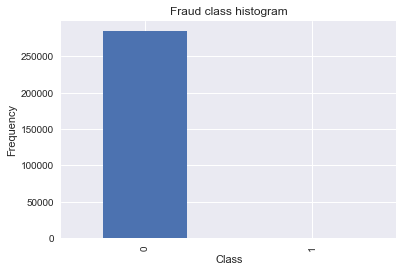

In [9]:
# 查看数据分布
# 查看class列多少种值
count_classes = pd.value_counts(data["Class"], sort=True).sort_index()
# pandas直接绘图，柱形图
count_classes.plot(kind="bar")
sns.set()
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


In [3]:
# 先把amount列0-1标准化，因为别的列都已经做了这种处理
from sklearn.preprocessing import StandardScaler

# 0-1标准化的数据放到normAmount列
data["normAmount"] = StandardScaler().fit_transform(data["Amount"].values.reshape(-1, 1))
# 删去无用的time和amount列
data = data.drop(["Time", "Amount"], axis=1, errors="ignore")
data[:5]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [17]:
# 下采样

# x为特征值
x = data.iloc[:, data.columns != "Class"]
y = data.iloc[:, data.columns == "Class"]
# print(data.shape)
# print(x.shape)
# print(y.shape)

# 负样本的数量
number_record_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)
#print("number_record_fraud=", number_record_fraud)

# 正样本
normal_indices = data[data.Class == 0].index

# 下取样，在占大部分data中数据的正样本中，随机取数据，取和负样本一样多的数据
# 第一个参数是从什么数据里面随机，第二个参数是随机多少个
random_normal_indices = np.random.choice(normal_indices, number_record_fraud, replace=False)
# print("random_normal_indices.shape=", random_normal_indices.shape)
random_normal_indices = np.array(random_normal_indices)

# 把负样本index和下采样的正样本index组合，
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
# print("under_sample_indices.shape=", under_sample_indices.shape)

# 通过index得到数据
under_sample_data = data.iloc[under_sample_indices]
# print("under_sample_data.shape=", under_sample_data.shape)

# 区分特征值和标签值
x_undersample = under_sample_data.iloc[:, under_sample_data.columns != "Class"]
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == "Class"]

# Show info
print("Percentage of normal transactions:",
      len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data))
print("Percentage of fraud transactions:",
      len(under_sample_data[under_sample_data.Class == 1]) / len(under_sample_data))
print("Total number of transactions in resampled data:", len(under_sample_data))


Percentage of normal transactions: 0.5
Percentage of fraud transactions: 0.5
Total number of transactions in resampled data: 984


In [22]:
# 交叉验证
from sklearn.cross_validation import train_test_split

# 切分训练集和测试集，在原始数据上
# x是特征值，y是标签值，test_size是测试集占比多少，random_state是为了查看数据方便，不会每次都随机
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print("x_train.len=", len(x_train))
print("x_test.len=", len(x_test))
print("total number=", len(x_train) + len(x_test))

# 对下采样处理过的数据进行切分
x_train_undersample, x_test_undersample, y_train_undersample, y_test_undersample = train_test_split(
    x_undersample, y_undersample, test_size=0.3, random_state=0
)

print("x_train_undersample.len=", len(x_train_undersample))
print("x_test_undersample.len=", len(x_test_undersample))
print("total number=", len(x_train_undersample) + len(x_test_undersample))


x_train.len= 199364
x_test.len= 85443
total number= 284807
x_train_undersample.len= 688
x_test_undersample.len= 296
total number= 984


In [74]:
# recall召回率、查全率
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

# 输出KFold的返回
# fold = KFold(len(y_train), 5, shuffle=False)
# print(fold)
# for iteration, indices in enumerate(fold, start=1):
#     print(iteration)
#     print(indices)
#     break

def printing_Kfold_scores(x_train_data, y_train_data):
    # 交叉验证
    # 把训练集再分成几组，两两组合当训练集，再选一个当测试集，就是交叉验证
    fold = KFold(len(y_train_data), 5, shuffle=False)

    # 正则化惩罚
    c_param_range = [0.01, 0.1, 1, 10, 100]

    results_table = pd.DataFrame(index=range(len(c_param_range), 2), columns=["C_parameter", "Mean recall score"])
    results_table["C_parameter"] = c_param_range

    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold, start=1):
            # 创建逻辑回归模型
            # c是政策话惩罚的值，penalty是选择L1正则
            lr = LogisticRegression(C=c_param, penalty="l1")

            # flod里面是交叉验证要用的index,我们要用这个index来取得本次交叉验证的数据
            lr.fit(x_train_data.iloc[indices[0], :], y_train_data.iloc[indices[0], :].values.ravel())

            # 预测值
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1], :].values)

            # 计算recall
            recall_acc = recall_score(y_train_data.iloc[indices[1], :].values, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration, ': recall score = ', recall_acc)

        results_table.loc[j, "Mean recall score"] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].values.argmax()]['C_parameter']

    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')

    return best_c


In [75]:
# 运行printing_Kfold_scores
best_c = printing_Kfold_scores(x_train_undersample, y_train_undersample)


-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.9315068493150684
Iteration  2 : recall score =  0.9178082191780822
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.9594594594594594
Iteration  5 : recall score =  0.9696969696969697

Mean recall score  0.955694299529916

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8493150684931506
Iteration  2 : recall score =  0.863013698630137
Iteration  3 : recall score =  0.9322033898305084
Iteration  4 : recall score =  0.9324324324324325
Iteration  5 : recall score =  0.8939393939393939

Mean recall score  0.8941807966651245

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.8767123287671232
Iteration  3 : rec

Iteration  1 : recall score =  0.863013698630137


Iteration  2 : recall score =  0.8767123287671232
Iteration  3 : recall score =  0.9830508474576272


Iteration  4 : recall score =  0.9459459459459459
Iteration  5 : recall score =  0.9090909090909091

Mean recall score  0.9155627459783485

*********************************************************************************
Best model to choose from cross validation is with C parameter =  0.01
*********************************************************************************


In [83]:
# 绘制混淆矩阵
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    sns.set()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.show()


Recall metric in the testing dataset:  0.9251700680272109


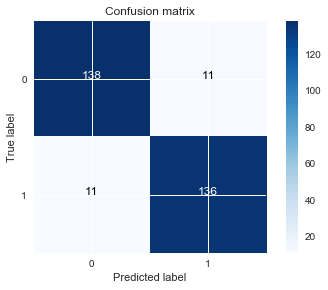

In [86]:
lr = LogisticRegression(C=best_c, penalty="l1")
lr.fit(x_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(x_test_undersample.values)

# 第一个参数是训练集，第二个参数是测试集
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

class_names = [0, 1]
sns.set()
plot_confusion_matrix(cnf_matrix, class_names)

# 这是在下采样的训练集上作出的混淆矩阵


Recall metric in the testing dataset:  0.9183673469387755


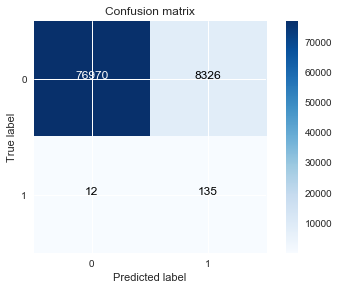

In [89]:
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(x_train_undersample, y_train_undersample.values.ravel())
y_pred = lr.predict(x_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# Plot non-normalized confusion matrix
class_names = [0, 1]
sns.set()
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.show()

# 这个是去测试集上做的混淆矩阵，可以看到NP的值很高，也就是误杀的值很多，
# 误杀的值多，这个就是下采样的缺点


In [91]:
# 不用交叉验证，直接在x_train上逻辑回归
best_c = printing_Kfold_scores(x_train, y_train)

# 可以看到recall的值很低


-------------------------------------------
C parameter:  0.01
-------------------------------------------



Iteration  1 : recall score =  0.4925373134328358


Iteration  2 : recall score =  0.6027397260273972


Iteration  3 : recall score =  0.6833333333333333


Iteration  4 : recall score =  0.5692307692307692


Iteration  5 : recall score =  0.45

Mean recall score  0.5595682284048672

-------------------------------------------
C parameter:  0.1
-------------------------------------------



Iteration  1 : recall score =  0.5671641791044776


Iteration  2 : recall score =  0.6164383561643836


Iteration  3 : recall score =  0.6833333333333333


Iteration  4 : recall score =  0.5846153846153846


Iteration  5 : recall score =  0.525

Mean recall score  0.5953102506435158

-------------------------------------------
C parameter:  1
-------------------------------------------



Iteration  1 : recall score =  0.5522388059701493


Iteration  2 : recall score =  0.6164383561643836


Iteration  3 : recall score =  0.7166666666666667


Iteration  4 : recall score =  0.6153846153846154


Iteration  5 : recall score =  0.5625

Mean recall score  0.612645688837163

-------------------------------------------
C parameter:  10
-------------------------------------------



Iteration  1 : recall score =  0.5522388059701493


Iteration  2 : recall score =  0.6164383561643836


Iteration  3 : recall score =  0.7333333333333333


Iteration  4 : recall score =  0.6153846153846154


Iteration  5 : recall score =  0.575

Mean recall score  0.6184790221704963

-------------------------------------------
C parameter:  100
-------------------------------------------



Iteration  1 : recall score =  0.5522388059701493


Iteration  2 : recall score =  0.6164383561643836


Iteration  3 : recall score =  0.7333333333333333


Iteration  4 : recall score =  0.6153846153846154


Iteration  5 : recall score =  0.575

Mean recall score  0.6184790221704963

*********************************************************************************
Best model to choose from cross validation is with C parameter =  10.0
*********************************************************************************


Recall metric in the testing dataset:  0.6190476190476191


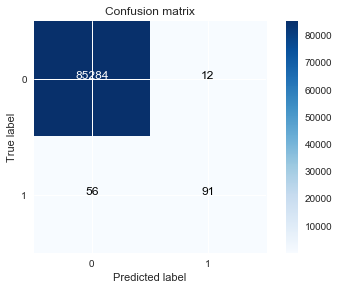

In [92]:
# 用上面的best_c去做测试集的混淆矩阵
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(x_train, y_train.values.ravel())
y_pred = lr.predict(x_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# Plot non-normalized confusion matrix
class_names = [0, 1]
sns.set()
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.show()


Recall metric in the testing dataset:  1.0


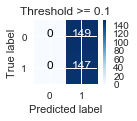

Recall metric in the testing dataset:  1.0


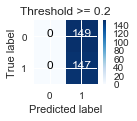

Recall metric in the testing dataset:  1.0


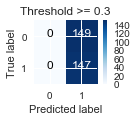

Recall metric in the testing dataset:  0.9863945578231292


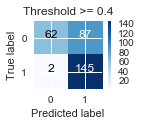

Recall metric in the testing dataset:  0.9251700680272109


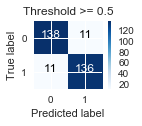

Recall metric in the testing dataset:  0.8639455782312925


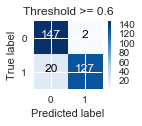

Recall metric in the testing dataset:  0.8231292517006803


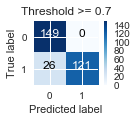

Recall metric in the testing dataset:  0.7482993197278912


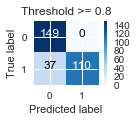

Recall metric in the testing dataset:  0.5850340136054422


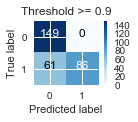

In [104]:
# 我们也可以用阈值来控制结果
# 可以自定义阈值
lr = LogisticRegression(C=0.01, penalty='l1')
lr.fit(x_train_undersample, y_train_undersample.values.ravel())
# 注意这里是predict_proba，而不是predict
# 因为这里是要得到概率，然后和自定义的阈值作比较
y_pred_undersample_proba = lr.predict_proba(x_test_undersample.values)

# 自定义阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# sns.set()

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:, 1] > i

    plt.subplot(3, 3, j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

    # Plot non-normalized confusion matrix
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s' % i)

# 可以看到阈值的不同，也会对结果造成差异


In [105]:
# 过采样，生成足够多的数据
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 重新读取数据
data = pd.read_csv("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\CreditCard\\creditcard.csv")
# print(data.shape)
data[:5]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [109]:
# x为特征值
x = data.iloc[:, data.columns != "Class"]
y = data.iloc[:, data.columns == "Class"]

# 切分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.2, random_state=0)

# 过采样算法 SMOTE
oversampler = SMOTE(random_state=0)
# 得到过采样的数据
x_oversample, y_oversample = oversampler.fit_sample(x_train, y_train)
print("x_oversample.shape=", x_oversample.shape)


x_oversample.shape= (454908, 30)


In [110]:
# 计算过采样时候的best_c
x_oversample = pd.DataFrame(x_oversample)
y_oversample = pd.DataFrame(y_oversample)
best_c = printing_Kfold_scores(x_oversample, y_oversample)


-------------------------------------------
C parameter:  0.01
-------------------------------------------



Iteration  1 : recall score =  0.8903225806451613


Iteration  2 : recall score =  0.8947368421052632


Iteration  3 : recall score =  0.9688170853159235


Iteration  4 : recall score =  0.9578923071850166


Iteration  5 : recall score =  0.958397907255361

Mean recall score  0.9340333445013451

-------------------------------------------
C parameter:  0.1
-------------------------------------------



Iteration  1 : recall score =  0.8903225806451613


Iteration  2 : recall score =  0.8947368421052632


Iteration  3 : recall score =  0.9704105344694036


Iteration  4 : recall score =  0.960112550972181


Iteration  5 : recall score =  0.960541211901386

Mean recall score  0.935224744018679

-------------------------------------------
C parameter:  1
-------------------------------------------



Iteration  1 : recall score =  0.8903225806451613


Iteration  2 : recall score =  0.8947368421052632


Iteration  3 : recall score =  0.9704769281841319


Iteration  4 : recall score =  0.9597828117958694


Iteration  5 : recall score =  0.9608159945483122

Mean recall score  0.9352270314557476

-------------------------------------------
C parameter:  10
-------------------------------------------



Iteration  1 : recall score =  0.8903225806451613


Iteration  2 : recall score =  0.8947368421052632


Iteration  3 : recall score =  0.9701006971340046


Iteration  4 : recall score =  0.9603323770897221


Iteration  5 : recall score =  0.9499346017300315

Mean recall score  0.9330854197408366

-------------------------------------------
C parameter:  100
-------------------------------------------



Iteration  1 : recall score =  0.8903225806451613


Iteration  2 : recall score =  0.8947368421052632


Iteration  3 : recall score =  0.9696359411309062


Iteration  4 : recall score =  0.9602664292544597


Iteration  5 : recall score =  0.9602994031720908

Mean recall score  0.9350522392615762

*********************************************************************************
Best model to choose from cross validation is with C parameter =  1.0
*********************************************************************************


Recall metric in the testing dataset:  0.900990099009901


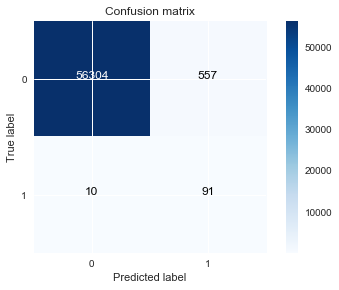

In [112]:
# 画出过采样的时候的混淆矩阵
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(x_oversample, y_oversample.values.ravel())
y_pred = lr.predict(x_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

# 可以看到相比于下采样的NP，也就是误杀来说，过采样的NP值好了很多
